In [119]:
import pandas as pd

In [120]:
url = 'http://www.seoul.go.kr/coronaV/coronaStatus.do'
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [121]:
table = pd.read_html(url)
len(table)

4

In [122]:
table[0]

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구
0,118,102,204,211,170,290,256,439,185,297,427,339,229
1,+1,0,+4,+7,+2,+5,+7,+7,+5,+5,+16,+4,+2
2,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
3,265,251,484,250,108,274,360,513,418,473,574,261,615
4,+5,+12,+58,+5,+1,+3,+5,+1,+8,+11,+16,+5,+18


In [123]:
table[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [124]:
import requests

In [125]:
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1'

In [126]:
url = url + "&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&order%5B0%5D%5Bdir%5D=desc&start=100&length=1000'

In [127]:
response = requests.get(url)
data_json = response.json()

In [128]:
records_total = data_json['recordsTotal']
records_total

8113

In [129]:
end_page = round(records_total / 100) + 1
end_page

82

In [130]:
data = data_json["data"]

In [131]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>8113</p>,32036,11.25.,기타,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>8112</p>,31995,11.25.,타시도,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>8111</p>,31997,11.25.,타시도,-,타시도 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>8110</p>,32080,11.25.,동작구,-,감염경로 조사중,<b class=''></b>
4,<p class='corona19_no'>8109</p>,32187,11.25.,중랑구,-,감염경로 조사중,<b class=''></b>


In [132]:
def get_seoul_covid19_100(page_no):
    """
    page_no : 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
    start_no : 입력받은 page_no로 
    """
    start_no = (page_no - 1) * 100
    url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw={page_no}"
    url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
    response = requests.get(url)
    data_json = response.json()
    return data_json

In [133]:
get_seoul_covid19_100(1000)

{'draw': 1000, 'recordsTotal': 8113, 'recordsFiltered': 8113, 'data': []}

In [134]:
!pip install tqdm

In [135]:
import time
from tqdm import trange

In [136]:
page_list = []

all_page = 3

for page_no in trange(all_page + 1):
    one_page = get_seoul_covid19_100(page_no)
    one_page = pd.DataFrame(one_page["data"])
    page_list.append(one_page)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.77it/s]


In [137]:
def get_multi_page_list(start_page, end_page):
    # 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오록 합니다.
    # all_page = 3
    for page_no in trange(start_page, end_page + 1):
        one_page = get_seoul_covid19_100(page_no)
        one_page = pd.DataFrame(one_page["data"])
        page_list.append(one_page)
        # 서버에 한번에 너무 많은요청을 보내면 서버에 부담이 됩니다.
        # 서버에 부담을 주지 않기 위애 0.5초씩 쉬었다 가져옵니다.
        time.sleep(0.5)
    return page_list

In [138]:
start_page = 1
page_list = []
page_list = get_multi_page_list(start_page, end_page)
page_list

100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [01:08<00:00,  1.20it/s]


[                                  0      1       2    3  4           5  \
 0   <p class='corona19_no'>8113</p>  32036  11.25.   기타  -    감염경로 조사중   
 1   <p class='corona19_no'>8112</p>  31995  11.25.  타시도  -   기타 확진자 접촉   
 2   <p class='corona19_no'>8111</p>  31997  11.25.  타시도  -  타시도 확진자 접촉   
 3   <p class='corona19_no'>8110</p>  32080  11.25.  동작구  -    감염경로 조사중   
 4   <p class='corona19_no'>8109</p>  32187  11.25.  중랑구  -    감염경로 조사중   
 ..                              ...    ...     ...  ... ..         ...   
 95  <p class='corona19_no'>8018</p>  32046  11.25.  양천구  -    감염경로 조사중   
 96  <p class='corona19_no'>8017</p>  32038  11.25.  양천구  -    감염경로 조사중   
 97  <p class='corona19_no'>8016</p>  32052  11.25.  마포구  -   기타 확진자 접촉   
 98  <p class='corona19_no'>8015</p>  32026  11.25.  서초구  -  서초구 사우나 관련   
 99  <p class='corona19_no'>8014</p>  31890  11.25.  송파구  -    감염경로 조사중   
 
                    6  
 0   <b class=''></b>  
 1   <b class=''></b>  
 2   <b class=''></b>  
 3

In [139]:
df_all = pd.concat(page_list)
df_all.shape

(8113, 7)

In [140]:
df_all.head()

,0,1,2,3,4,5,6
0,<p class='corona19_no'>8113</p>,32036,11.25.,기타,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>8112</p>,31995,11.25.,타시도,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>8111</p>,31997,11.25.,타시도,-,타시도 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>8110</p>,32080,11.25.,동작구,-,감염경로 조사중,<b class=''></b>
4,<p class='corona19_no'>8109</p>,32187,11.25.,중랑구,-,감염경로 조사중,<b class=''></b>


In [141]:
df = table[3]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [142]:
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [143]:
df_all.columns = cols

In [144]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>8113</p>,32036,11.25.,기타,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>8112</p>,31995,11.25.,타시도,-,기타 확진자 접촉,<b class=''></b>
2,<p class='corona19_no'>8111</p>,31997,11.25.,타시도,-,타시도 확진자 접촉,<b class=''></b>
3,<p class='corona19_no'>8110</p>,32080,11.25.,동작구,-,감염경로 조사중,<b class=''></b>
4,<p class='corona19_no'>8109</p>,32187,11.25.,중랑구,-,감염경로 조사중,<b class=''></b>


In [145]:
import re
def extract_number(num_string):
    num = re.sub("[^0-9]", "", num_string)
    num = int(num)
    return num

In [146]:
num_string = "<p class='corona19_no'>7625</p>"
extract_number(num_string)

197625

In [147]:
df_all["연번"] = df_all["연번"].map(extract_number)

In [149]:
def extract_hangeul(origin_text):
    subtract_text = re.sub("[^가-힣]", "", origin_text)
    return subtract_text

In [150]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [151]:
extract_hangeul("<b class='status2'>사망</b>")

'사망'

In [152]:
extract_hangeul("<b class=''></b>")

''

In [153]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    6258
<b class=''></b>             1247
<b class='status1'></b>       431
<b class='status2'></b>        90
<b class='status2'>사망</b>      87
Name: 퇴원현황, dtype: int64

In [154]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,198113,32036,11.25.,기타,-,감염경로 조사중,<b class=''></b>
1,198112,31995,11.25.,타시도,-,기타 확진자 접촉,<b class=''></b>
2,198111,31997,11.25.,타시도,-,타시도 확진자 접촉,<b class=''></b>
3,198110,32080,11.25.,동작구,-,감염경로 조사중,<b class=''></b>
4,198109,32187,11.25.,중랑구,-,감염경로 조사중,<b class=''></b>


In [163]:
df_all.loc[df_all['퇴원현황'].str.contains('퇴원'), '퇴원현황'] = '퇴원'
df_all.loc[df_all['퇴원현황'].str.contains('사망'), '퇴원형황'] = '사망'
df_all.loc[~df_all['퇴원현황'].str.contains('퇴원|사망'), '퇴원현황'] = ''
df_all['퇴원현황'].value_counts()

퇴원                           6258
                             1768
<b class='status2'>사망</b>      87
Name: 퇴원현황, dtype: int64

In [167]:
last_day = df_all.iloc[0]['확진일']
last_day

'11.25.'

In [168]:
date = last_day.replace('.', '_')
date

'11_25_'

In [169]:
file_name = f'seoul-covid19-{date}.csv'
file_name

'seoul-covid19-11_25_.csv'

In [170]:
df_all.to_csv(file_name, index=False)

In [179]:
df = pd.read_csv(file_name)
df.shape

(8113, 8)

In [180]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황
0,198113,32036,11.25.,기타,-,감염경로 조사중,NaN,NaN
1,198112,31995,11.25.,타시도,-,기타 확진자 접촉,NaN,NaN
2,198111,31997,11.25.,타시도,-,타시도 확진자 접촉,NaN,NaN
3,198110,32080,11.25.,동작구,-,감염경로 조사중,NaN,NaN
4,198109,32187,11.25.,중랑구,-,감염경로 조사중,NaN,NaN


In [177]:
df['확진일'].value_counts()

11.25.    213
8.29.     167
8.27.     160
8.26.     157
11.20.    156
         ... 
4.18.       1
3.5.        1
5.31.       1
4.15.       1
5.01.       1
Name: 확진일, Length: 280, dtype: int64

In [182]:
df['확진일자'] = pd.to_datetime('2020-'+ df['확진일'].str.replace('.', '-'))

In [183]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자
0,198113,32036,11.25.,기타,-,감염경로 조사중,NaN,NaN,2020-11-25
1,198112,31995,11.25.,타시도,-,기타 확진자 접촉,NaN,NaN,2020-11-25
2,198111,31997,11.25.,타시도,-,타시도 확진자 접촉,NaN,NaN,2020-11-25
3,198110,32080,11.25.,동작구,-,감염경로 조사중,NaN,NaN,2020-11-25
4,198109,32187,11.25.,중랑구,-,감염경로 조사중,NaN,NaN,2020-11-25
...,...,...,...,...,...,...,...,...,...
8108,195,9,1.31.,성북구,-,#5 접촉,퇴원,NaN,2020-01-31
8109,194,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30
8110,193,6,1.30.,종로구,-,#3 접촉,퇴원,NaN,2020-01-30
8111,192,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-30


In [184]:
df['월'] = df['확진일자'].dt.month
df['주'] = df['확진일자'].dt.week
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주
0,198113,32036,11.25.,기타,-,감염경로 조사중,NaN,NaN,2020-11-25,11,48
1,198112,31995,11.25.,타시도,-,기타 확진자 접촉,NaN,NaN,2020-11-25,11,48
2,198111,31997,11.25.,타시도,-,타시도 확진자 접촉,NaN,NaN,2020-11-25,11,48
3,198110,32080,11.25.,동작구,-,감염경로 조사중,NaN,NaN,2020-11-25,11,48
4,198109,32187,11.25.,중랑구,-,감염경로 조사중,NaN,NaN,2020-11-25,11,48


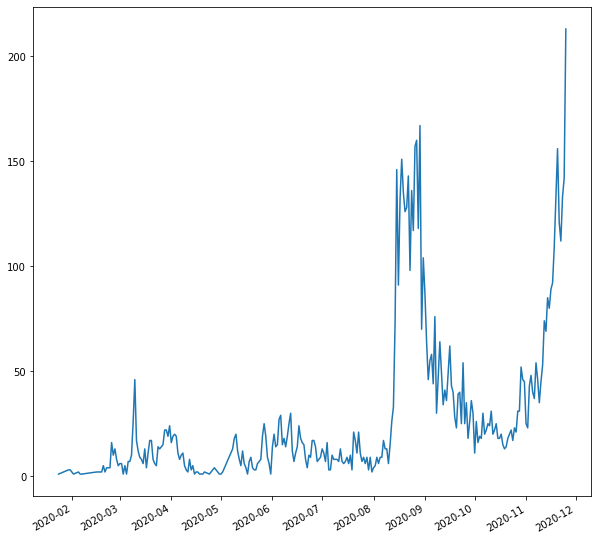

In [187]:
df['확진일자'].value_counts().plot(figsize=(10,10))

In [188]:
df['월일'] = df['확진일자'].astype(str).map(lambda x: x[-5:])

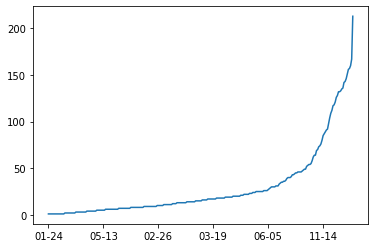

In [190]:
df['월일'].value_counts().sort_values().plot()

In [193]:
day_count = df['월일'].value_counts().sort_index()
day_count

01-24      1
01-30      3
01-31      3
02-02      1
02-05      2
        ... 
11-21    121
11-22    112
11-23    133
11-24    142
11-25    213
Name: 월일, Length: 278, dtype: int64

In [194]:
df['월일'].describe()

count      8113
unique      278
top       11-25
freq        213
Name: 월일, dtype: object

In [195]:
day_count.describe()

count    278.000000
mean      29.183453
std       37.747290
min        1.000000
25%        7.000000
50%       15.000000
75%       31.000000
max      213.000000
Name: 월일, dtype: float64

In [197]:
df[df['월일'] == '11-25']['거주지'].value_counts()

강서구     58
타시도     16
노원구     16
송파구     16
양천구     12
강남구     11
서초구      8
성동구      7
성북구      7
중랑구      6
동대문구     5
강동구      5
구로구      5
마포구      5
강북구      5
동작구      5
도봉구      4
은평구      4
용산구      4
영등포구     3
광진구      2
서대문구     2
기타       2
관악구      1
종로구      1
도붕구      1
종랑구      1
금천구      1
Name: 거주지, dtype: int64

In [201]:
import matplotlib.pyplot as plt

In [202]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

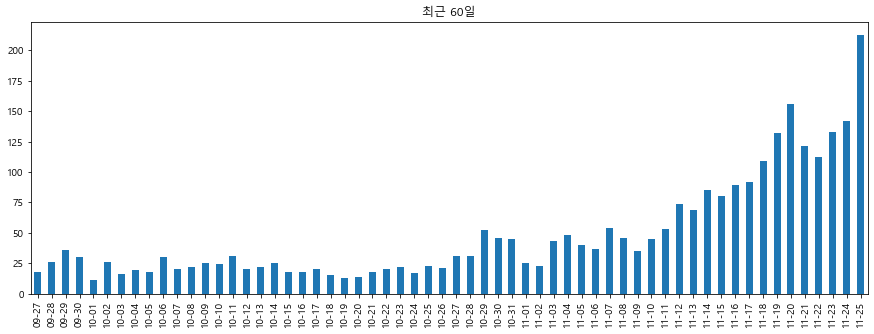

In [205]:
day_count[-60:].plot.bar(figsize=(15,5), title= '최근 60일')

In [207]:
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일
0,198113,32036,11.25.,기타,-,감염경로 조사중,NaN,NaN,2020-11-25,11,48,11-25


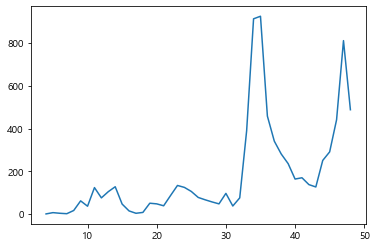

In [212]:
week_count = df['주'].value_counts().sort_index()
week_count.plot()

In [213]:
week_count_median = week_count.median()
week_count_mean = week_count.mean()
week_count_median, week_count_mean

(97.0, 180.2888888888889)

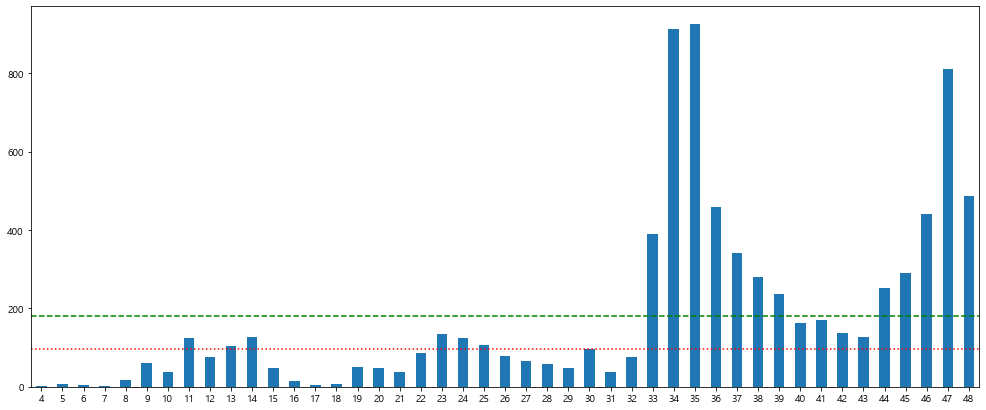

In [219]:
week_count.plot.bar(figsize=(17,7), rot=0)
plt.axhline(week_count_median, color='r', linestyle=':')
plt.axhline(week_count_mean, color='g', linestyle='--')

In [222]:
month_week_count = df.groupby(['월','주'])['연번'].count()

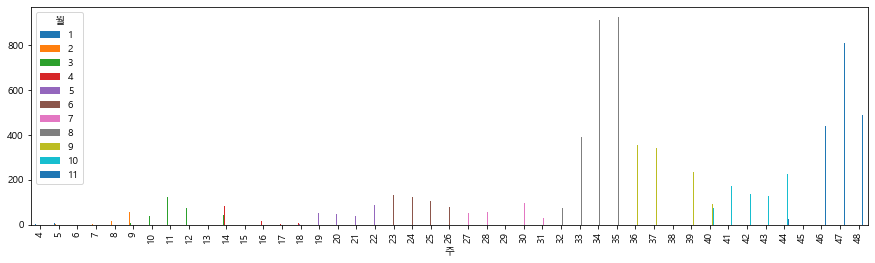

In [224]:
month_week_count.unstack().T.plot.bar(figsize=(15, 4))

In [225]:
day_count = df['확진일자'].value_counts().sort_index()

In [227]:
first_day = day_count.index[0]
last_day = day_count.index[-1]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-11-25 00:00:00'))

In [228]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25'],
              dtype='datetime64[ns]', length=307, freq='D')

In [229]:
df_days = pd.DataFrame({"연월일": days})
df_days.head()

,연월일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [230]:
day_count = df["확진일자"].value_counts().sort_index()
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일자, dtype: int64

In [231]:
df_day_count = day_count.reset_index()

In [232]:
df_day_count.columns = ["확진일자", "확진수"]
df_day_count.head(3)

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3


In [233]:
df_all_days = df_days.merge(df_day_count, 
                            left_on="연월일", 
                            right_on="확진일자", 
                            how="left")
df_all_days = df_all_days[["연월일", "확진수"]]
df_all_days.head()

,연월일,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [234]:
df_all_days["확진수"] = df_all_days["확진수"].fillna(0).astype(int)
df_all_days.head(3)

,연월일,확진수
0,2020-01-24,1
1,2020-01-25,0
2,2020-01-26,0


In [235]:
df_all_days["일자"] = df_all_days["연월일"].astype(str).map(lambda x : x[-5:])
df_all_days

,연월일,확진수,일자
0,2020-01-24,1,01-24
1,2020-01-25,0,01-25
2,2020-01-26,0,01-26
3,2020-01-27,0,01-27
4,2020-01-28,0,01-28
...,...,...,...
302,2020-11-21,121,11-21
303,2020-11-22,112,11-22
304,2020-11-23,133,11-23
305,2020-11-24,142,11-24


In [236]:
df_all_days["누적확진"] = df_all_days["확진수"].cumsum()
df_all_days[["확진수", "누적확진"]].head(10)

,확진수,누적확진
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,3,4
7,3,7
8,0,7
9,1,8


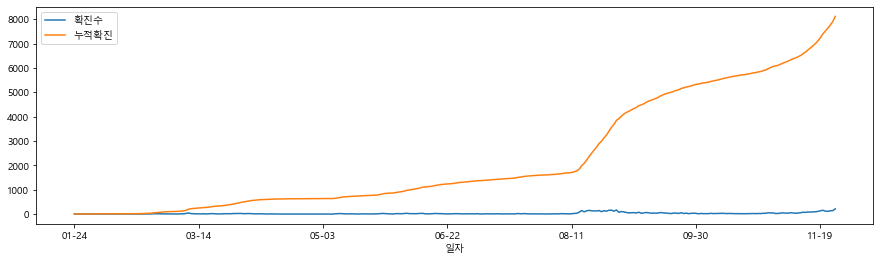

In [239]:
df_g = df_all_days[['일자','확진수','누적확진' ]]
df_g = df_g.set_index("일자")
df_g.plot(figsize=(15, 4))

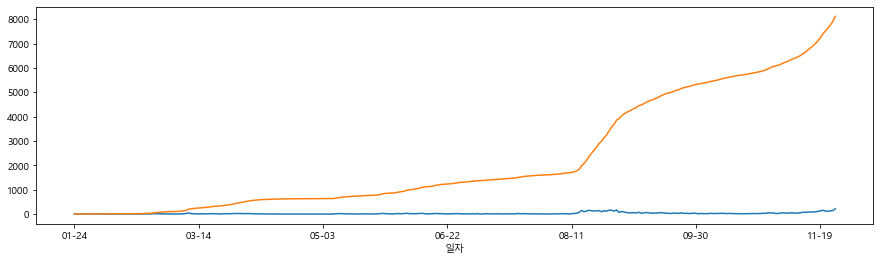

In [240]:
df_g["확진수"].plot()
df_g["누적확진"].plot(figsize=(15, 4))

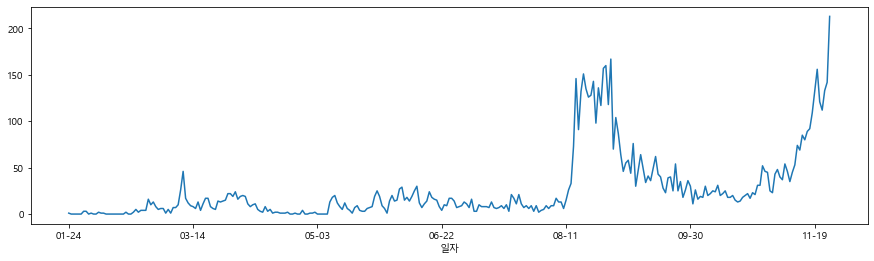

In [242]:
df_g["확진수"].plot(figsize=(15, 4))

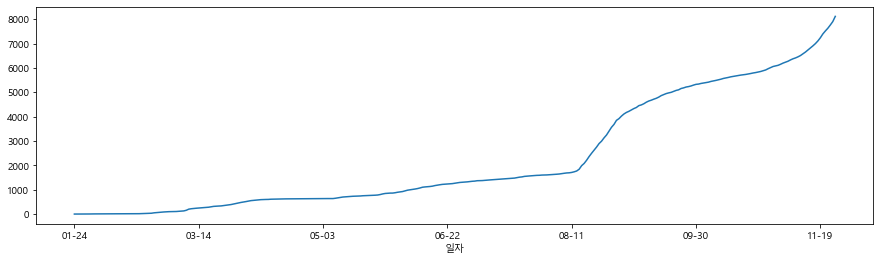

In [243]:
df_g["누적확진"].plot(figsize=(15, 4))

In [245]:
import numpy as np

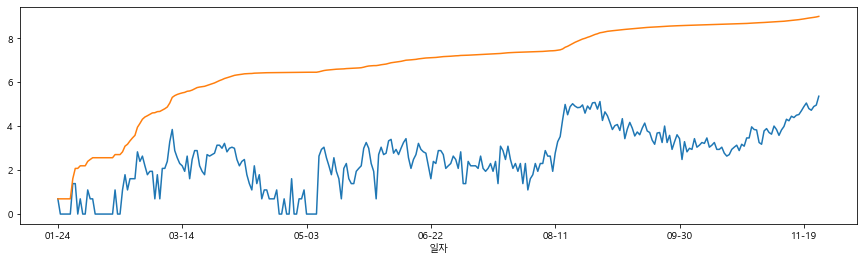

In [246]:
np.log(df_g["확진수"] + 1).plot()
np.log(df_g["누적확진"] + 1).plot(figsize=(15, 4))

In [247]:
df["요일"] = df["확진일자"].dt.dayofweek
df[["확진일자", "요일"]].head()

,확진일자,요일
0,2020-11-25,2
1,2020-11-25,2
2,2020-11-25,2
3,2020-11-25,2
4,2020-11-25,2


In [248]:
weekday_name = "월 화 수 목 금 토 일"
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [249]:
df["요일명"] = df["요일"].map(lambda x :weekday_name[x])
df[["확진일자", "요일", "요일명"]].head()

,확진일자,요일,요일명
0,2020-11-25,2,수
1,2020-11-25,2,수
2,2020-11-25,2,수
3,2020-11-25,2,수
4,2020-11-25,2,수


In [250]:
g = df.groupby(["월", "요일명"])["연번"].count()
g.index

MultiIndex([( 1, '금'),
            ( 1, '목'),
            ( 2, '금'),
            ( 2, '목'),
            ( 2, '수'),
            ( 2, '월'),
            ( 2, '일'),
            ( 2, '토'),
            ( 2, '화'),
            ( 3, '금'),
            ( 3, '목'),
            ( 3, '수'),
            ( 3, '월'),
            ( 3, '일'),
            ( 3, '토'),
            ( 3, '화'),
            ( 4, '금'),
            ( 4, '목'),
            ( 4, '수'),
            ( 4, '월'),
            ( 4, '일'),
            ( 4, '토'),
            ( 4, '화'),
            ( 5, '금'),
            ( 5, '목'),
            ( 5, '수'),
            ( 5, '월'),
            ( 5, '일'),
            ( 5, '토'),
            ( 5, '화'),
            ( 6, '금'),
            ( 6, '목'),
            ( 6, '수'),
            ( 6, '월'),
            ( 6, '일'),
            ( 6, '토'),
            ( 6, '화'),
            ( 7, '금'),
            ( 7, '목'),
            ( 7, '수'),
            ( 7, '월'),
            ( 7, '일'),
            ( 7, '토'),
           

In [251]:
g = g.unstack()
g = g.fillna(0).astype(int)
g = g[weekday_name]
g

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [252]:
g.style.background_gradient(cmap="Greens")

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


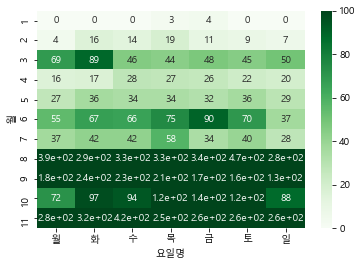

In [253]:
import seaborn as sns
sns.heatmap(g, cmap="Greens", annot=True, vmax=100)

In [254]:
gu_count = df["거주지"].value_counts()

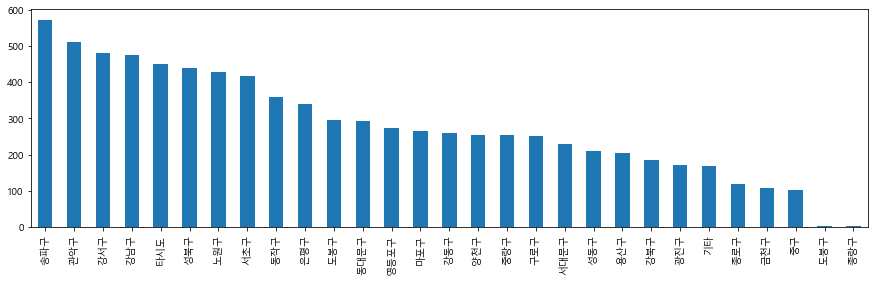

In [255]:
gu_count.plot.bar(figsize=(15, 4), rot=90)

In [256]:
seoul_gu = gu_count.head(25).index
seoul_gu

Index(['송파구', '관악구', '강서구', '강남구', '타시도', '성북구', '노원구', '서초구', '동작구', '은평구',
       '도봉구', '동대문구', '영등포구', '마포구', '강동구', '양천구', '중랑구', '구로구', '서대문구', '성동구',
       '용산구', '강북구', '광진구', '기타', '종로구'],
      dtype='object')

In [257]:
df[~df["거주지"].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명
110,198003,32009,11.25.,금천구,-,감염경로 조사중,NaN,NaN,2020-11-25,11,48,11-25,2,수
156,197957,31901,11.25.,종랑구,-,기타 확진자 접촉,NaN,NaN,2020-11-25,11,48,11-25,2,수
189,197924,31815,11.25.,도붕구,-,기타 확진자 접촉,NaN,NaN,2020-11-25,11,48,11-25,2,수
235,197878,31603,11.24.,금천구,-,감염경로 조사중,NaN,NaN,2020-11-24,11,48,11-24,1,화
246,197867,31578,11.24.,중구,-,기타 확진자 접촉,NaN,NaN,2020-11-24,11,48,11-24,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887,19226,7925,3.12.,금천구,-,콜센터직원 접촉,퇴원,NaN,2020-03-12,3,11,03-12,3,목
7926,19187,7637,3.10.,금천구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-10,3,11,03-10,1,화
7976,19137,7463,3.9.,금천구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-09,3,11,03-09,0,월
7977,19136,7461,3.9.,중구,-,구로구 콜센터 관련,퇴원,NaN,2020-03-09,3,11,03-09,0,월


In [258]:
df["지역"] = df["거주지"]
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
0,198113,32036,11.25.,기타,-,감염경로 조사중,NaN,NaN,2020-11-25,11,48,11-25,2,수,기타


In [259]:
df.loc[~df["거주지"].isin(seoul_gu), "지역"] = "타지역"

In [260]:
df["지역"] = df["거주지"].map(lambda x : x if x in seoul_gu else "타지역")
df.tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,퇴원형황,확진일자,월,주,월일,요일,요일명,지역
8112,191,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,NaN,2020-01-24,1,4,01-24,4,금,강서구


In [261]:
def find_seoul_gu(x):
    if x in seoul_gu:
        return x
    else:
        return "타지역"

In [262]:
df["지역"] = df["거주지"].apply(find_seoul_gu)

In [263]:
df["지역"] = df["거주지"].map(find_seoul_gu)

In [264]:
df.loc[df["지역"] == "타지역", "거주지"].unique()

array(['금천구', '종랑구', '도붕구', '중구'], dtype=object)

In [265]:
seoul_gu_count = df["지역"].value_counts()

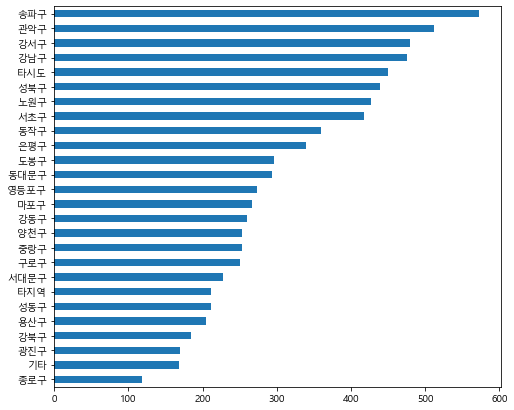

In [266]:
seoul_gu_count.sort_values().plot.barh(figsize=(8, 7))

In [267]:
df["접촉력"].value_counts().head(10)

기타 확진자 접촉        1358
감염경로 조사중          766
성북구 사랑제일교회 관련     641
확인 중              586
해외 접촉 추정          404
타시도 확진자 접촉        340
이태원 클럽 관련         139
8.15서울도심집회        126
리치웨이 관련           119
해외 유입             105
Name: 접촉력, dtype: int64

In [268]:
df["접촉력"].value_counts(normalize=True).head(10) * 100

기타 확진자 접촉        16.738568
감염경로 조사중          9.441637
성북구 사랑제일교회 관련     7.900900
확인 중              7.222975
해외 접촉 추정          4.979662
타시도 확진자 접촉        4.190805
이태원 클럽 관련         1.713300
8.15서울도심집회        1.553063
리치웨이 관련           1.466782
해외 유입             1.294219
Name: 접촉력, dtype: float64

In [269]:
df["접촉력"].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '타시도 확진자 접촉', '강서구 댄스교습관련 시설',
       '서초구 사우나Ⅱ 관련', '해외 유입', '중구 교회 관련', '용산구 국군복지단 관련',
       '강서구 소재 병원관련(11월)', '서초구 사우나 관련', '마포구 홍대새교회 관련', '동창 운동 모임 관련',
       '노원구 가족관련', '동작구 임용단기고시 관련', '성동구 소재 PC방 관련', '마포구 소재 노인복지시설 관련',
       '동작구 모조카페 관련', '마포구 홍대세교회관련', '수도권 지인모임(11월) 관련', '중랑구 체육시설 관련',
       '마포구 홍대세교회 관련', '동대문구 고등학교(마포구 홍대 새교회관련)', '감염경로 조사 중',
       '노원구 의료기관 관련', '강남구 헬스장 관련', '강남구 음식점Ⅱ 관련', '성북구 가족 관련',
       '송파구 잠언의료기(강남구CJ텔레닉스)', '동작구 임용단기학원 관련', '수도권산악회(11월) 관련',
       '동작구 교회 기도처 관련', '동작구 모조카페', '성동구 금호노인요양원 관련', '동대문구 에이스희망케어센터 관련',
       '서울대병원 발생 관련', '도봉구 의류업작업장 관련', '연세대 학생 관련', '동대문구 고등학교 관련',
       '성동구 체육시설 관련', '서초구 소재 교회/교육원 관련', '서울시청(11월) 관련',
       '동대문구 고등학교(마포구 홍대새교회 관련)', '서초구 어린이집 관련', '동작구 가족관련(11월)',
       '강서구 경로당 관련', '도봉구 청련사 관련', '송파구 지인강원여행모임', '성동구 시장관련',
       '영등포구 증권회사 관련', '서대문구 요양시설 관련', '용산구 국군복지단', '중구 제조업공장 관련',
       '노원구 가족 관련', '서초구 소재 교회,교육원관련', '수도권 미술대학원/아이스하키',
       '송파구 지

In [270]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [271]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [272]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

In [273]:
contact_count = df["접촉력"].value_counts()
contact_count

기타 확진자 접촉              1358
감염경로 조사중                766
성북구 사랑제일교회 관련           641
확인 중                    628
해외 접촉 추정                404
                       ... 
#935 접촉자                  1
서초구 LG 유플러스               1
강남구 CJ텔레닉스[잠언의료기]         1
고양시 반석교회 관련 (케네디상가)       1
관악구 식당관련                  1
Name: 접촉력, Length: 391, dtype: int64

In [274]:
df["접촉력"].value_counts(normalize=True).head(15) * 100 

기타 확진자 접촉                  16.738568
감염경로 조사중                    9.441637
성북구 사랑제일교회 관련               7.900900
확인 중                        7.740663
해외 접촉 추정                    4.979662
타시도 확진자 접촉                  4.190805
이태원 클럽 관련                   1.713300
8.15서울도심집회                  1.553063
리치웨이 관련                     1.466782
해외 유입                       1.294219
동대문구 에이스희망케어센터 관련           0.875139
도봉구 다나병원                    0.838161
강남구 헬스장 관련                  0.813509
서초구 사우나 관련                  0.801183
동대문구 고등학교(마포구 홍대 새교회관련)     0.739554
Name: 접촉력, dtype: float64

In [275]:
contact_count.head(15)

기타 확진자 접촉                  1358
감염경로 조사중                    766
성북구 사랑제일교회 관련               641
확인 중                        628
해외 접촉 추정                    404
타시도 확진자 접촉                  340
이태원 클럽 관련                   139
8.15서울도심집회                  126
리치웨이 관련                     119
해외 유입                       105
동대문구 에이스희망케어센터 관련            71
도봉구 다나병원                     68
강남구 헬스장 관련                   66
서초구 사우나 관련                   65
동대문구 고등학교(마포구 홍대 새교회관련)      60
Name: 접촉력, dtype: int64

In [276]:
top_contact = contact_count.head(15).index
top_contact

Index(['기타 확진자 접촉', '감염경로 조사중', '성북구 사랑제일교회 관련', '확인 중', '해외 접촉 추정',
       '타시도 확진자 접촉', '이태원 클럽 관련', '8.15서울도심집회', '리치웨이 관련', '해외 유입',
       '동대문구 에이스희망케어센터 관련', '도봉구 다나병원', '강남구 헬스장 관련', '서초구 사우나 관련',
       '동대문구 고등학교(마포구 홍대 새교회관련)'],
      dtype='object')

In [277]:
df_top_contact = df[df["접촉력"].isin(top_contact)]

In [278]:
contact_group = df_top_contact.groupby(["접촉력", "월"])["연번"].count().unstack()
contact_group = contact_group.fillna(0).astype(int)
contact_group = contact_group.sort_values(by=[5, 6, 3, 4, 7, 3], ascending=False)
contact_group.style.background_gradient()

월,2,3,4,5,6,7,8,9,10,11
접촉력,,,,,,,,,,
이태원 클럽 관련,0,0,0,133,6,0,0,0,0,0
해외 접촉 추정,1,121,112,24,23,39,47,23,14,0
확인 중,10,28,9,12,75,49,444,1,0,0
타시도 확진자 접촉,5,17,4,2,6,16,92,76,34,88
리치웨이 관련,0,0,0,0,119,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,510
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0
감염경로 조사중,0,0,0,0,0,0,11,284,125,346
강남구 헬스장 관련,0,0,0,0,0,0,0,0,18,48
